<a href="https://colab.research.google.com/github/inesfrsantos/MachineLearning/blob/main/Final_Code_Annina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Preprocessing
## Load needed packages and Data

In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import hashlib
import time
import psutil
import os
import random
import shutil
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm 
from sklearn.metrics import classification_report
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix

In [2]:
# Data is stored in a GitHub Repository
!git clone https://github.com/inesfrsantos/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 95312, done.
remote: Counting objects: 100% (23304/23304), done.
remote: Compressing objects: 100% (8723/8723), done.
remote: Total 95312 (delta 14599), reused 23269 (delta 14581), pack-reused 72008
Receiving objects: 100% (95312/95312), 155.52 MiB | 25.95 MiB/s, done.
Resolving deltas: 100% (31192/31192), done.
Updating files: 100% (224210/224210), done.


In [3]:
!ls

MachineLearning  sample_data


In [4]:
path = "/content/MachineLearning/Dataset/ArASL_Database_54K_Final"

In [5]:
# create empty lists to store image file paths, images, and labels
img_path = []
images = []
labels = []

# loop through each folder in the path
for folder_name in os.listdir(path):
    # create the full path to the folder
    folder_path = os.path.join(path, folder_name)
    # skip any non-directory files
    if not os.path.isdir(folder_path):
        continue
    # loop through each file in the folder
    for file_name in os.listdir(folder_path):
        # check if the file is a jpg, png, JPG, or PNG file
        if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".JPG") or file_name.endswith(".PNG"):
            # create the full path to the image file
            image_path = os.path.join(folder_path, file_name)
            # check if the file is a regular file
            if os.path.isfile(image_path):
                # open the image file and convert it to grayscale
                image = Image.open(image_path).convert('L')
                # append the image file path, image, and label to their respective lists
                images.append(image)
                labels.append(folder_name)
                img_path.append(image_path)

# create a pandas dataframe with the image file paths, images, and labels as columns
df = pd.DataFrame({'img_path': img_path, 'image': images, 'label': labels})

## Exploratory Analysis

In [6]:
#get the total number of pictures in the dataset
num_pics = len(df)
print("Number of pictures in the dataset:\n")
print(num_pics, "\n")

#get the total number of pictures per category and the corresponding percentage
label_counts = df['label'].value_counts()
print("Number and Percentage of pictures per Label:\n")
for label, count in label_counts.items():
    percentage = count/num_pics * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures in the dataset:

54049 

Number and Percentage of pictures per Label:

ain: 2114 (3.91%)
ghain: 1977 (3.66%)
fa: 1955 (3.62%)
saad: 1895 (3.51%)
taa: 1838 (3.40%)
laam: 1832 (3.39%)
nun: 1819 (3.37%)
ta: 1816 (3.36%)
bb: 1791 (3.31%)
toot: 1791 (3.31%)
kaaf: 1774 (3.28%)
thaa: 1766 (3.27%)
meem: 1765 (3.27%)
la: 1746 (3.23%)
dha: 1723 (3.19%)
ya: 1722 (3.19%)
gaaf: 1705 (3.15%)
aleff: 1672 (3.09%)
dhad: 1670 (3.09%)
ra: 1659 (3.07%)
seen: 1638 (3.03%)
dal: 1634 (3.02%)
khaa: 1607 (2.97%)
ha: 1592 (2.95%)
thal: 1582 (2.93%)
jeem: 1552 (2.87%)
haa: 1526 (2.82%)
sheen: 1507 (2.79%)
zay: 1374 (2.54%)
waw: 1371 (2.54%)
al: 1343 (2.48%)
yaa: 1293 (2.39%)


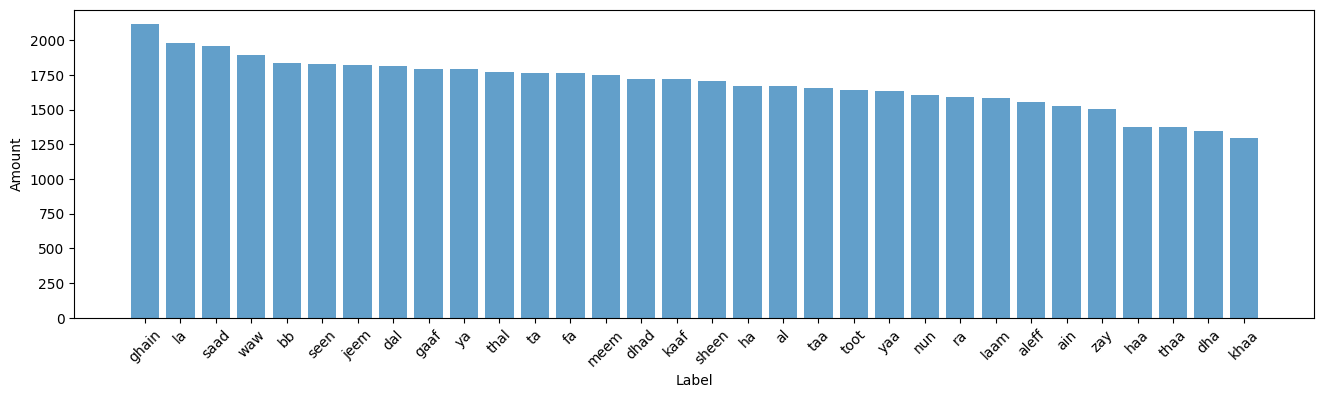

In [7]:
# plot the count of images per Label
# Get unique labels from the dataframe
Label = df['label'].unique()

# Set the size of the plot
plt.figure(figsize=(16,4))

# Create a bar chart of label counts
plt.bar(range(len(label_counts)), label_counts, alpha = .7)

# Set x-axis tick marks and labels to the unique labels
plt.xticks(range(len(label_counts)), Label, rotation = 45)

# Set x and y axis labels
plt.xlabel("Label")
plt.ylabel("Amount")

# Display the plot
plt.show()

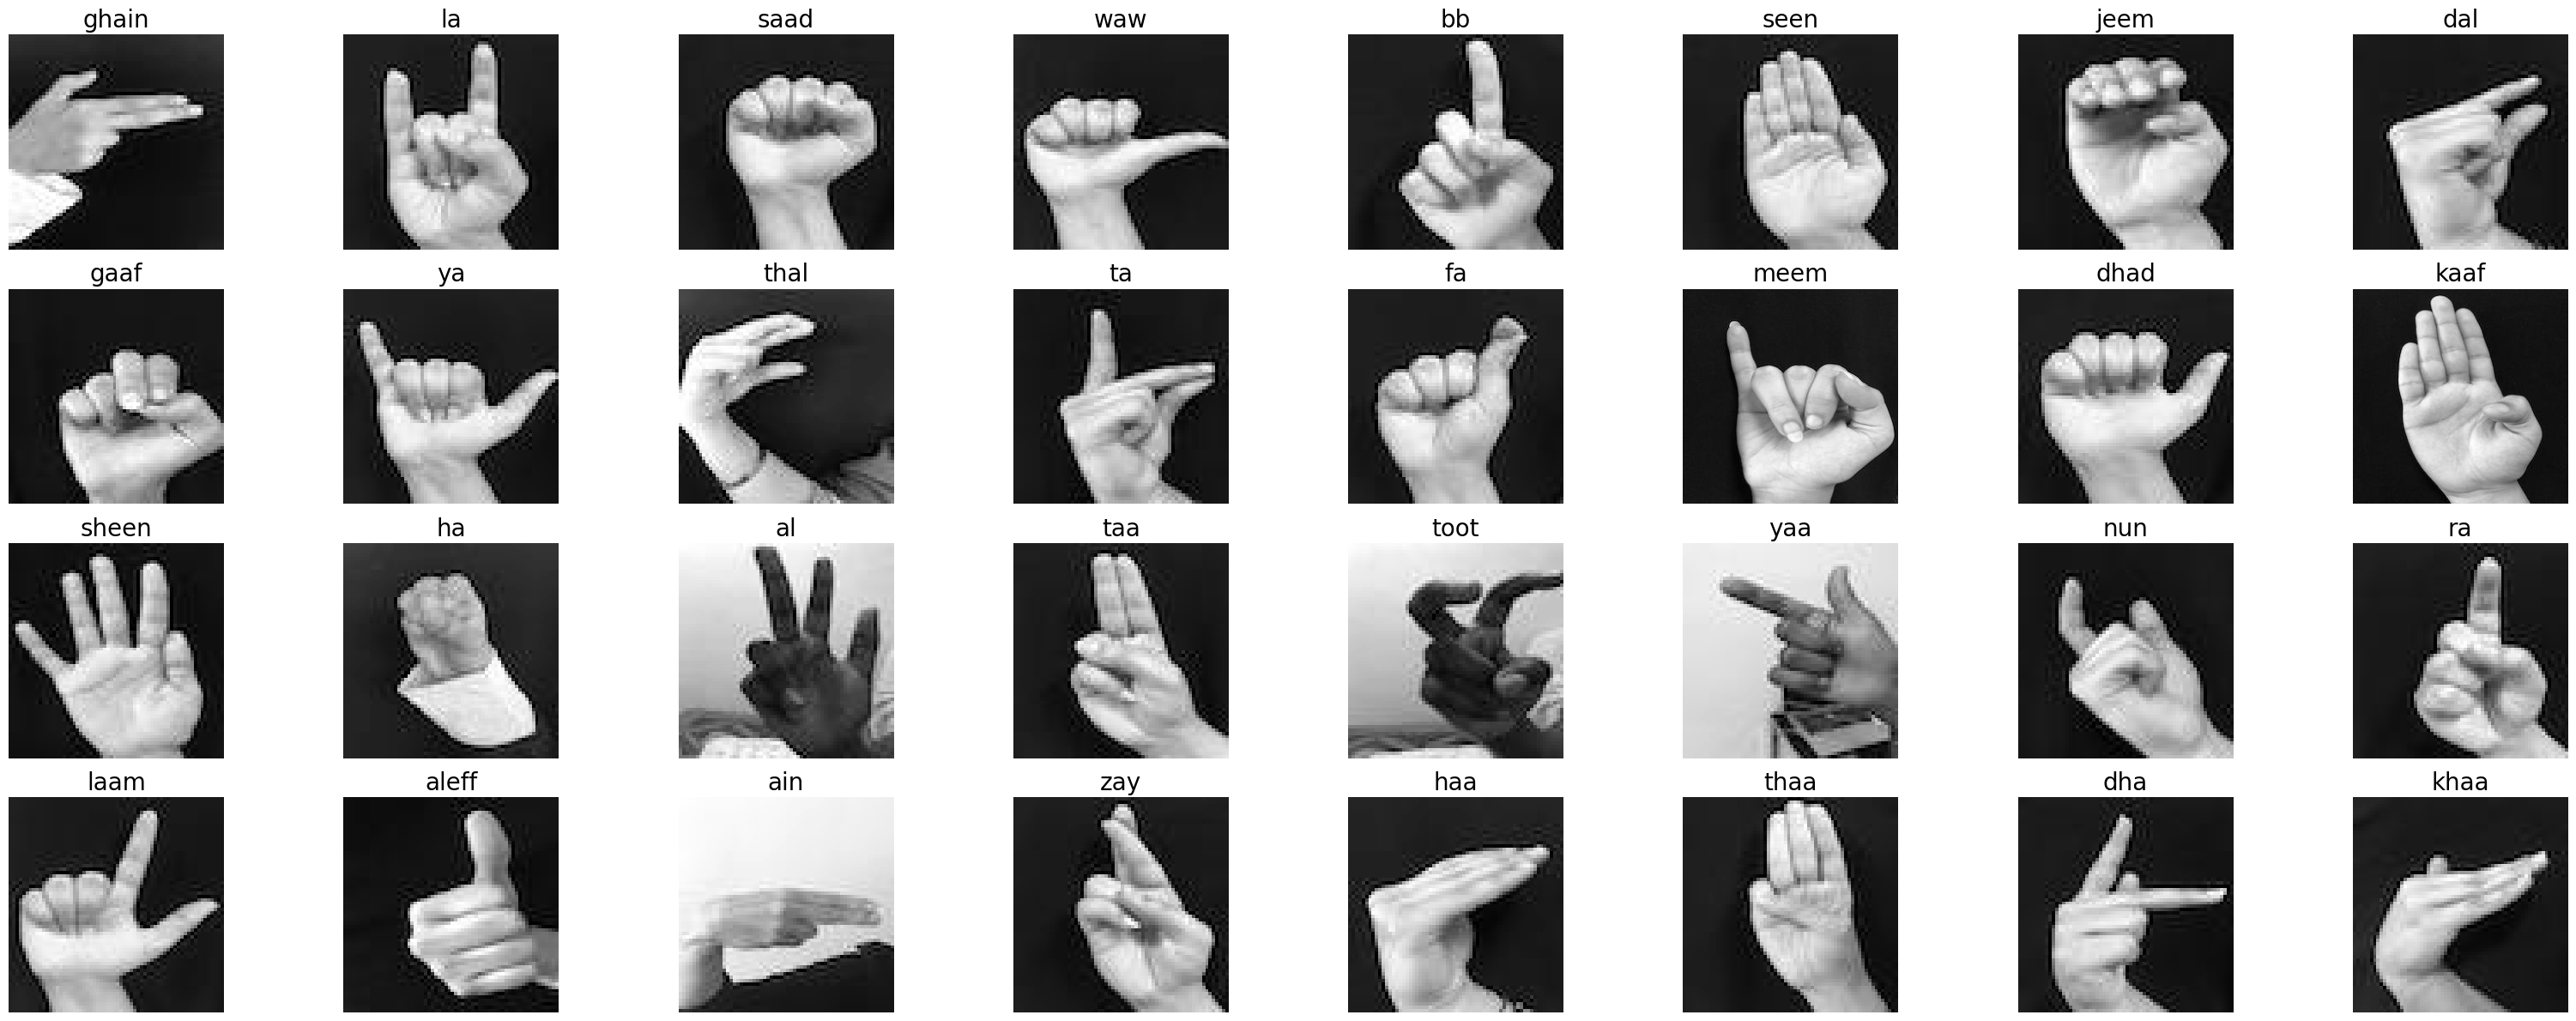

In [8]:
# Plot Examples of all signs with theri best quality
# Get one image for each label
label_to_image = {}
for label in df['label'].unique():
    label_df = df[df['label'] == label]
    variances = [np.var(np.array(image)) for image in label_df['image']]
    max_idx = np.argmax(variances)
    label_to_image[label] = label_df.iloc[max_idx]['image']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=int(np.ceil(len(label_to_image) / 8)), ncols=8, figsize=(32, 12))

# Loop over each label and plot the corresponding image
for i, (label, image) in enumerate(label_to_image.items()):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(label, fontsize=20)
    axs[row, col].axis('off')

# Adjust spacing and display the plot
fig.tight_layout()
plt.show()

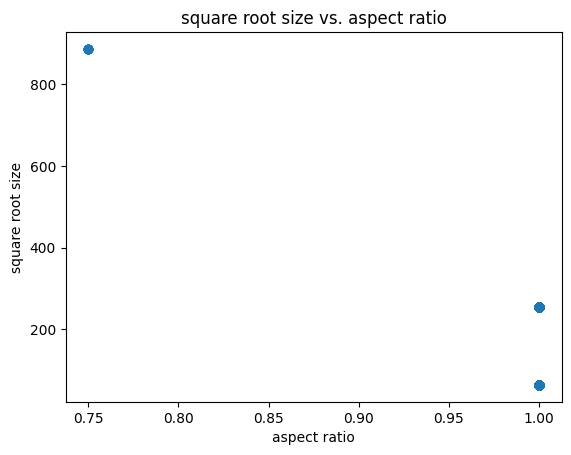

In [9]:
# plot the square root size vs aspect ratio to see the distribution of sizes
# first calculate the square root size and the aspect ratio
square_root_size = []
aspect_ratio = []
for image in df['image']:
  #size of the images in pixels
  width, height = image.size
  
  #calculate the square root size
  sqrt_size = (width * height) ** 0.5
  square_root_size.append(sqrt_size)

  #cxalculate the aspect_ration
  aspt_rt = width/height
  aspect_ratio.append(aspt_rt)

# plot the data
fig, ax = plt.subplots()
ax.scatter(aspect_ratio, square_root_size)

# add labels and a title
ax.set_xlabel("aspect ratio")
ax.set_ylabel("square root size")
ax.set_title("square root size vs. aspect ratio")

# show the plot
plt.show()

In [10]:
df['aspect_ratio'] = aspect_ratio
df['square_root_size'] = square_root_size

In [11]:
# Calculate the number of images with different aspect ratios than 1:1.
num_dif_ratio = len(np.where(df['aspect_ratio'] != 1)[0])
print(f"Number of different ratio: {num_dif_ratio}")

Number of different ratio: 10


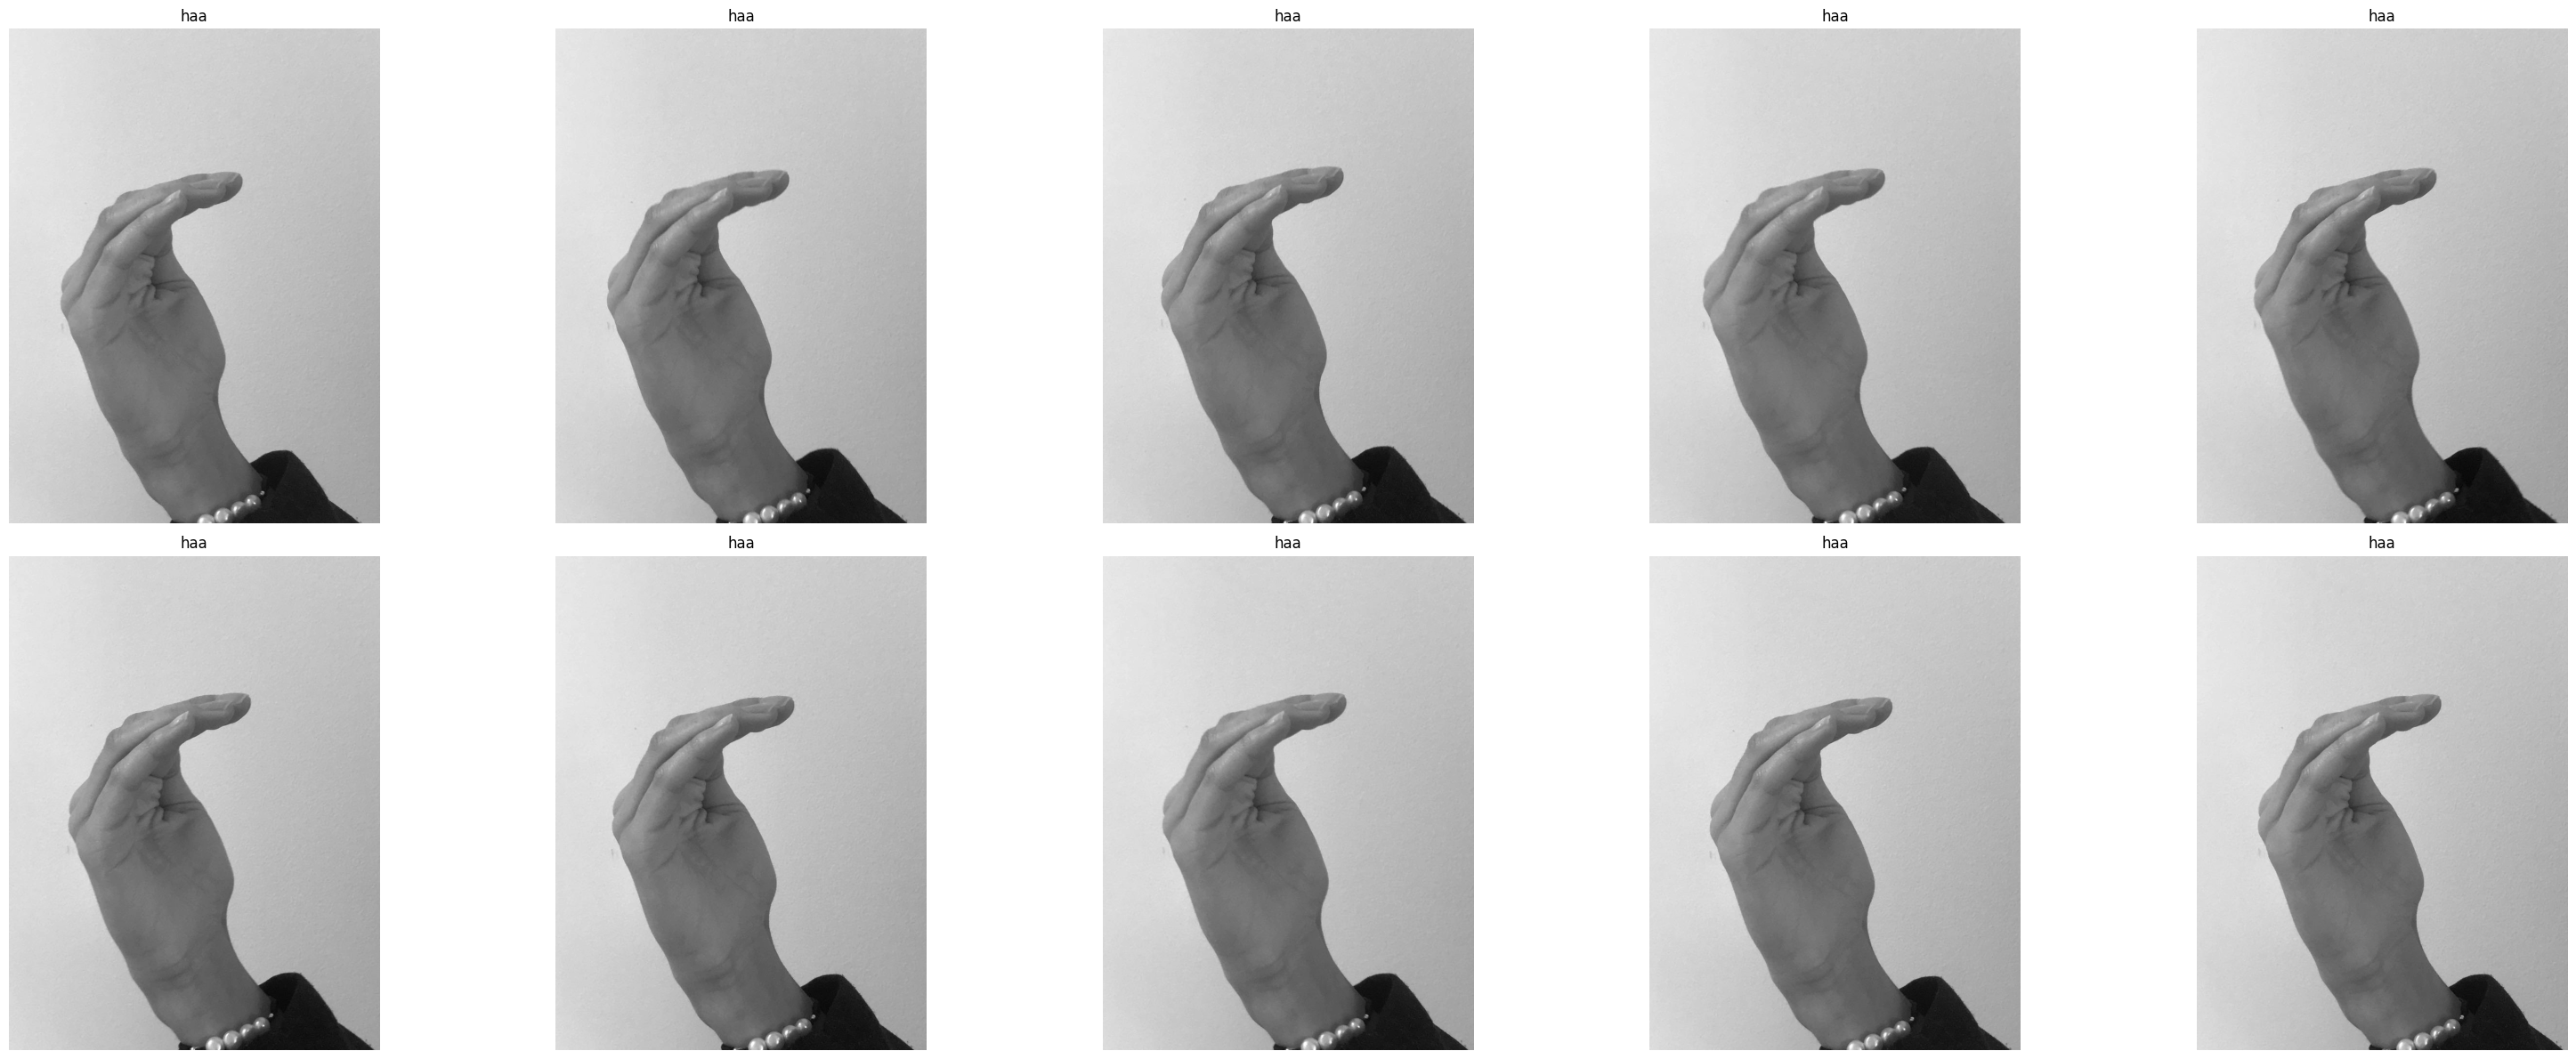

In [12]:
#reduce the dataframe to the rows that have a different aspect ratio than 1
df_asp = df.loc[df['aspect_ratio'] != 1]

# Define the number of columns in the figure
num_cols = 5

# Calculate the number of rows needed
num_rows = len(df_asp) // num_cols

# Create a new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(32, 12))

# Flatten the axes array for ease of iteration
axes = axes.flatten()

# Loop through each image in the DataFrame and display it
for i, (_, row) in enumerate(df_asp.iterrows()):
    img = row['image']
    ax = axes[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(row['label'])
    ax.axis('off')
    
# Remove any unused axes
for i in range(len(df), num_rows * num_cols):
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [13]:
# Find rows where the image size is not (64,64)
non_6464_rows = df[df['image'].apply(lambda x: x.size) != (64,64)]

#get the total number of pictures that are not size (64,64)
num_pics_64 = len(non_6464_rows)
num_pics = len(df)
Perc_of_whole = num_pics_64/num_pics * 100
print("Number of pictures with different size:\n")
print(num_pics_64)
print("That is", f"{Perc_of_whole:.2f}%", "of the whole dataset \n")

#split the information per category
label_counts_64 = non_6464_rows['label'].value_counts()
label_counts = df['label'].value_counts()
print("Number and Percentage of different sized pictures per Label:")
print("(The Percentage refers to the number of all pictures of that label):\n")
for label, count in label_counts_64.items():
    percentage = count/label_counts[label] * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures with different size:

648
That is 1.20% of the whole dataset 

Number and Percentage of different sized pictures per Label:
(The Percentage refers to the number of all pictures of that label):

kaaf: 320 (18.04%)
meem: 318 (18.02%)
haa: 10 (0.66%)


In [14]:
# Color Channel Analysis
def get_channel_means(image):
    return np.mean(np.array(image))
# Initialize a list to store the mean pixel intensity of each color channel
channel_means = []

# Loop through the images in the dataset and calculate the channel means
for i in range(len(df)):
    image = df['image'][i]
    channel_means.append(get_channel_means(image))

# Convert the channel means to a numpy array and calculate the mean and standard deviation for the channel
channel_means = np.array(channel_means)
mean_intensity = np.mean(channel_means)
std_intensity = np.std(channel_means)

# Print the mean and standard deviation for the channel
print("Mean pixel intensity: {:.2f}".format(mean_intensity))
print("Standard deviation of pixel intensity: {:.2f}".format(std_intensity))

Mean pixel intensity: 164.73
Standard deviation of pixel intensity: 45.94


## Preprocessing

In [15]:
filtered_images = []

In [16]:
# Check for Duplicates

def get_hash(img_path):
    """
    Calculates the MD5 checksum of the input image.

    Args:
        img_path (str): The file path of the input image.

    Returns:
        str: The MD5 checksum of the image.
    """
    # Open the input image in binary mode
    with open(img_path, "rb") as f:
        # Initialize a new MD5 hash object
        img_hash = hashlib.md5()
        # Read the image data in chunks and update the hash object with each chunk
        while chunk := f.read(8192):
           img_hash.update(chunk)
    # Return the hexadecimal representation of the hash value
    return img_hash.hexdigest()

In [17]:
#Add a column to the DataFrame to store the hash values for each image in the dataset
df['hash'] = df['img_path'].apply(get_hash)

#Calculate the number of unique hash values in the dataset and identify duplicates based on the hash value
unique_values = df['hash'].nunique()
duplicates = df[df.duplicated(['hash'])]

#Print the number of duplicates found in the dataset
print("Duplicates in the Dataset based on the calculated hash value:")
print(len(duplicates), '\n')

#Print the total number of images in the dataset before dropping duplicates
print("Images in the Dataset before dropping Duplicates:")
print(len(df), '\n')

#Drop the duplicate images from the dataset based on the hash value and reset the index
df.drop_duplicates(subset=['hash'], inplace=True)
df = df.reset_index(drop=True)

#Print the total number of images in the dataset after dropping duplicates
print("Images in the Dataset after dropping Duplicates:")
print(len(df))

image_path = duplicates['img_path']
print(image_path)
for path in image_path:
  filtered_images.append(path)

print(len(filtered_images))

Duplicates in the Dataset based on the calculated hash value:
5670 

Images in the Dataset before dropping Duplicates:
54049 

Images in the Dataset after dropping Duplicates:
48379
39       /content/MachineLearning/Dataset/ArASL_Databas...
47       /content/MachineLearning/Dataset/ArASL_Databas...
77       /content/MachineLearning/Dataset/ArASL_Databas...
119      /content/MachineLearning/Dataset/ArASL_Databas...
122      /content/MachineLearning/Dataset/ArASL_Databas...
                               ...                        
54021    /content/MachineLearning/Dataset/ArASL_Databas...
54023    /content/MachineLearning/Dataset/ArASL_Databas...
54029    /content/MachineLearning/Dataset/ArASL_Databas...
54035    /content/MachineLearning/Dataset/ArASL_Databas...
54037    /content/MachineLearning/Dataset/ArASL_Databas...
Name: img_path, Length: 5670, dtype: object
5670


In [18]:
# Create an empty list to store the anomaly scores for each image
anomaly_scores = []

# Loop through each image in the dataset
for i in range(len(df)):
    # Load the image
    image = df.loc[i, 'image']
    
    # Calculate the mean and standard deviation of the image
    mean = np.mean(image)
    std = np.std(image)
    
    # Calculate the anomaly score
    anomaly_score = np.abs((image - mean) / std).mean()
    anomaly_scores.append(anomaly_score)

# Add the anomaly scores as a new column to the dataframe
df['anomaly_score'] = anomaly_scores

# Print the dataframe sorted by anomaly score
print(df.sort_values(by='anomaly_score', ascending=False))

                                                img_path  \
24785  /content/MachineLearning/Dataset/ArASL_Databas...   
25099  /content/MachineLearning/Dataset/ArASL_Databas...   
25336  /content/MachineLearning/Dataset/ArASL_Databas...   
25058  /content/MachineLearning/Dataset/ArASL_Databas...   
25715  /content/MachineLearning/Dataset/ArASL_Databas...   
...                                                  ...   
20024  /content/MachineLearning/Dataset/ArASL_Databas...   
5185   /content/MachineLearning/Dataset/ArASL_Databas...   
30237  /content/MachineLearning/Dataset/ArASL_Databas...   
28970  /content/MachineLearning/Dataset/ArASL_Databas...   
10713  /content/MachineLearning/Dataset/ArASL_Databas...   

                                                   image  label  aspect_ratio  \
24785  <PIL.Image.Image image mode=L size=64x64 at 0x...  sheen           1.0   
25099  <PIL.Image.Image image mode=L size=64x64 at 0x...  sheen           1.0   
25336  <PIL.Image.Image image mode=L

In [19]:
#Filter out images with anomaly scores above 0.85
anomal_img = df.loc[df['anomaly_score'] >= 0.85]
df_filtered = df.loc[df['anomaly_score'] < 0.85]

#Reset the index to start from 0
df_filtered = df_filtered.reset_index(drop=True)

#Print the number of images in the filtered dataset
print('Number of pictures in the dataset after filtering:')
print(len(df_filtered))

image_path = anomal_img['img_path']
for path in image_path:
  filtered_images.append(path)

print('Number of pictures that were filtered out:')
print(len(filtered_images))

Number of pictures in the dataset after filtering:
38645
Number of pictures that were filtered out:
15404


In [20]:
# filter the images from the train and test directories
for image_path in filtered_images:
  os.remove(image_path)

In [21]:
#!zip -r /content/MachineLearning/Dataset/filtered_Dataset.zip /content/MachineLearning/Dataset/ArASL_Database_54K_Final

In [22]:
# define the directory containing the images
original_dir = '/content/MachineLearning/Dataset/SignLanguage_filtered'

# define the directories for the training, validation, and test sets
train_dir = '/content/MachineLearning/Dataset/train_data'
val_dir = '/content/MachineLearning/Dataset/valid_data'
test_dir = '/content/MachineLearning/Dataset/test_data'

# create the directories for the training, validation, and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# define the size of the validation and test sets
val_size = 0.2
test_size = 0.2

# loop through the subdirectories in the original directory and copy the files to the train, validation, or test directories
for sub_dir in os.listdir(original_dir):
    sub_dir_path = os.path.join(original_dir, sub_dir)
    if not os.path.isdir(sub_dir_path):
        continue
    print(f'Processing {sub_dir_path}...')
    files = os.listdir(sub_dir_path)
    random.shuffle(files)
    num_files = len(files)
    num_val = int(val_size * num_files)
    num_test = int(test_size * num_files)
    num_train = num_files - num_val - num_test
    train_files = files[:num_train]
    val_files = files[num_train:num_train+num_val]
    test_files = files[num_train+num_val:]
    for filename in train_files:
        src = os.path.join(sub_dir_path, filename)
        dst = os.path.join(train_dir, sub_dir, filename)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)
    for filename in val_files:
        src = os.path.join(sub_dir_path, filename)
        dst = os.path.join(val_dir, sub_dir, filename)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)
    for filename in test_files:
        src = os.path.join(sub_dir_path, filename)
        dst = os.path.join(test_dir, sub_dir, filename)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)

Processing /content/MachineLearning/Dataset/SignLanguage_filtered/ghain...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/la...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/saad...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/waw...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/bb...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/seen...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/jeem...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/dal...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/gaaf...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/ya...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/thal...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/ta...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/fa...
Processing /content/MachineLearning/Dataset/SignL

## Data Augmentation on the training set

In [23]:
path = "/content/MachineLearning/Dataset/train_data"

# loop through the folders and augment images
for folder in os.listdir(path):
    print(folder)
    if folder == '.DS_Store':
        continue
    else:
        folder_path = os.path.join(path, folder)
        print(folder_path)
        for file in os.listdir(folder_path):
            if file == '.DS_Store':
                continue
            else:
                file_path = os.path.join(folder_path, file)
                print(file_path)
                image = tf.keras.preprocessing.image.load_img(file_path)
                image = tf.keras.preprocessing.image.img_to_array(image)
                image = np.expand_dims(image, axis=0)

                # Randomly select an augmentation operation
                operations = {
                    'rotation': random.choice([True, False]),
                    'width_shift': random.choice([True, False]),
                    'height_shift': random.choice([True, False]),
                    'shear': random.choice([True, False]),
                    'zoom': random.choice([True, False]),
                    'horizontal_flip': random.choice([True, False])
                }

                # Apply selected augmentation operation
                if operations['rotation']:
                    rotation_range = random.randint(1, 30)
                else:
                    rotation_range = 0

                if operations['width_shift']:
                    width_shift_range = random.uniform(0.1, 0.2)
                else:
                    width_shift_range = 0.0

                if operations['height_shift']:
                    height_shift_range = random.uniform(0.1, 0.2)
                else:
                    height_shift_range = 0.0

                if operations['shear']:
                    shear_range = random.uniform(0.1, 0.2)
                else:
                    shear_range = 0.0

                if operations['zoom']:
                    zoom_range = random.uniform(0.1, 0.2)
                else:
                    zoom_range = 0.0

                if operations['horizontal_flip']:
                    horizontal_flip = True
                else:
                    horizontal_flip = False

                image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=rotation_range,
                    width_shift_range=width_shift_range,
                    height_shift_range=height_shift_range,
                    shear_range=shear_range,
                    zoom_range=zoom_range,
                    horizontal_flip=horizontal_flip,
                    fill_mode='nearest'
                )

                augmented_image_iterator = image_generator.flow(image, batch_size=1)
                augmented_image = next(augmented_image_iterator)
                augmented_image = augmented_image[0].astype('uint8')
                augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image)
                filename, extension = os.path.splitext(file)
                new_filename = filename + '_aug' + extension
                new_file_path = os.path.join(folder_path, new_filename)
                augmented_image.save(new_file_path)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/content/MachineLearning/Dataset/train_data/aleff/Aleff (1519).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (878).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (1642).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (1117).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (346).JPG
/content/MachineLearning/Dataset/train_data/aleff/Aleff (1255).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (1581).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (205).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (382).JPG
/content/MachineLearning/Dataset/train_data/aleff/Aleff (338).JPG
/content/MachineLearning/Dataset/train_data/aleff/Aleff (226).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (1104).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (1505).jpg
/content/MachineLearning/Dataset/train_data/aleff/Aleff (1446).jpg
/

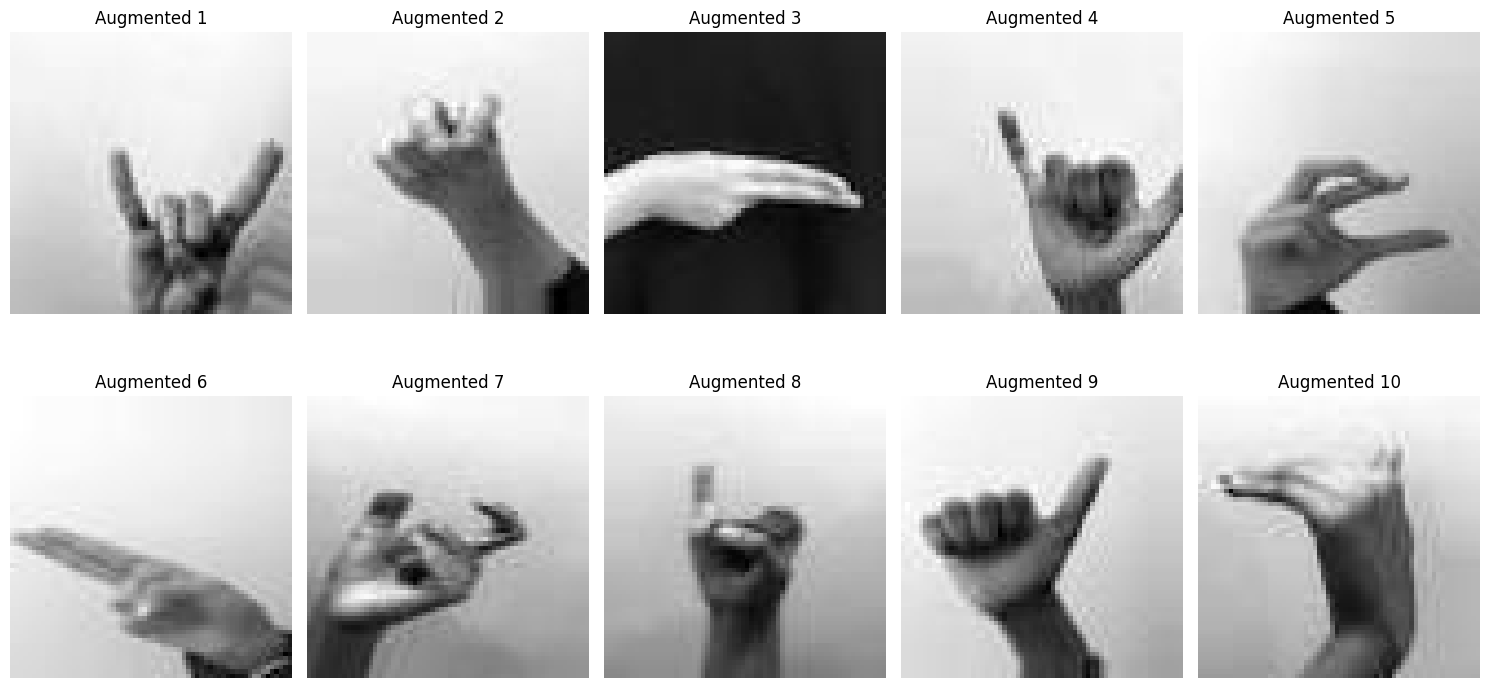

In [24]:
augmented_images = []

# loop through the folders and collect augmented images
for folder in os.listdir(path):
    if folder == '.DS_Store':
        continue
    else:
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            if file == '.DS_Store':
                continue
            else:
                file_path = os.path.join(folder_path, file)
                
                # Check if the file name contains the "_aug" suffix
                if "_aug" in file:
                    augmented_images.append(file_path)

# Randomly select 10 augmented images
selected_images = random.sample(augmented_images, 10)

# Display the selected augmented images
plt.figure(figsize=(15, 8))
for i, image_path in enumerate(selected_images):
    image = tf.keras.preprocessing.image.load_img(image_path)
    image = tf.keras.preprocessing.image.img_to_array(image)

    plt.subplot(2, 5, i + 1)
    plt.imshow(image.astype('uint8'))
    plt.title('Augmented {}'.format(i + 1))
    plt.axis('off')

plt.tight_layout()
plt.show()


## Build Model

In [25]:
# Set a random seed
tf.random.set_seed(123)

In [26]:
#create imagegenerator and load images, taking some images to create validation and training dataset
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

#create training dataset
train_generator = image_generator.flow_from_directory(
    '/content/MachineLearning/Dataset/train_set_augmented_random',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical') 

#create validation dataset
validation_generator = image_generator.flow_from_directory(
    '/content/MachineLearning/Dataset/valid_set', 
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical') 

#create test dataset
test_generator = tf.keras.utils.image_dataset_from_directory(
    '/content/MachineLearning/Dataset/test_set',
    image_size=(64, 64),
    batch_size=32,
    labels='inferred',
    label_mode='categorical')

test_generator = test_generator.map(lambda x, y: (x / 255.0, y))

Found 46430 images belonging to 32 classes.
Found 7715 images belonging to 32 classes.
Found 7715 files belonging to 32 classes.


### Simple CNN

In [27]:
#define simple CNN the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(patience=2, monitor='val_loss', mode='min', verbose=1)

In [28]:
# Start the timer
start_time = time.perf_counter()
# Get initial CPU times
initial_cpu_times = psutil.cpu_times()
# Get the current process ID
process_id = psutil.Process().pid

# train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=500,
    validation_data=validation_generator,
    validation_steps=100, 
    callbacks=[early_stop])

# Stop the timer
end_time = time.perf_counter()
# Get final CPU times
final_cpu_times = psutil.cpu_times()
# Get the memory usage of the current process
memory_info = psutil.Process(process_id).memory_info()

Epoch 1/500


<ipython-input-28-2eb4f8ae7379>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


200/200 [==============================] - 22s 103ms/step - loss: 3.3944 - accuracy: 0.0613 - val_loss: 2.9311 - val_accuracy: 0.2278
Epoch 2/500
200/200 [==============================] - 22s 111ms/step - loss: 2.3352 - accuracy: 0.3305 - val_loss: 1.8067 - val_accuracy: 0.5591
Epoch 3/500
200/200 [==============================] - 20s 99ms/step - loss: 1.5220 - accuracy: 0.5506 - val_loss: 1.1308 - val_accuracy: 0.7237
Epoch 4/500
200/200 [==============================] - 23s 117ms/step - loss: 1.1821 - accuracy: 0.6490 - val_loss: 0.8546 - val_accuracy: 0.8322
Epoch 5/500
200/200 [==============================] - 20s 102ms/step - loss: 0.9861 - accuracy: 0.6953 - val_loss: 0.6523 - val_accuracy: 0.8575
Epoch 6/500
200/200 [==============================] - 20s 98ms/step - loss: 0.8596 - accuracy: 0.7381 - val_loss: 0.5558 - val_accuracy: 0.8797
Epoch 7/500
200/200 [==============================] - 20s 102ms/step - loss: 0.7360 - accuracy: 0.7819 - val_loss: 0.4936 - val_accuracy:

In [29]:
# Calculate running time
running_time_simple = (end_time - start_time) / 60

# Calculate CPU usage
cpu_user_time = final_cpu_times.user - initial_cpu_times.user
cpu_system_time = final_cpu_times.system - initial_cpu_times.system
cpu_idle_time = final_cpu_times.idle - initial_cpu_times.idle

total_cpu_time = cpu_user_time + cpu_system_time + cpu_idle_time
cpu_usage_simple = (cpu_user_time + cpu_system_time) / total_cpu_time

# Calculate the absolute memory usage in bytes
absolute_memory_usage_simple = memory_info.rss

# Convert the memory usage to a human-readable format
memory_usage_human_simple = psutil._common.bytes2human(absolute_memory_usage_simple)

# Print the results
print("Running Time: {:.2f} minutes".format(running_time_simple))
print("CPU Usage: {:.2f} seconds".format(cpu_usage_simple))
print("Absolute Memory Usage: {} ({} bytes)".format(memory_usage_human_simple, absolute_memory_usage_simple))

Running Time: 6.48 minutes
CPU Usage: 0.67 seconds
Absolute Memory Usage: 3.4G (3599310848 bytes)


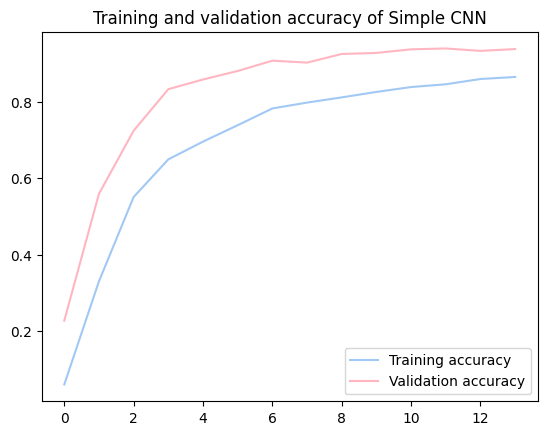

<Figure size 640x480 with 0 Axes>

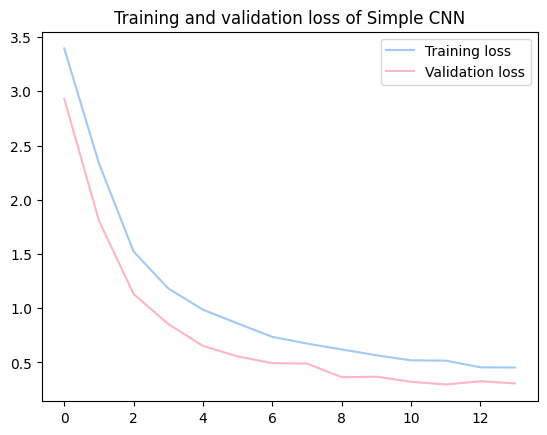

<Figure size 640x480 with 0 Axes>

In [36]:
# Prepare the data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Define the colors
colors = ['#a1c9f4', '#ffb6c1']  # Hexadecimal color codes for baby blue and baby green, respectively

# Plot accuracy
plt.plot(epochs, acc, color=colors[0], label='Training accuracy')
plt.plot(epochs, val_acc, color=colors[1], label='Validation accuracy')

plt.title('Training and validation accuracy of Simple CNN')
plt.legend(loc=0)
plt.figure()

plt.show()

# Plot loss
plt.plot(epochs, loss, color=colors[0], label='Training loss')
plt.plot(epochs, val_loss, color=colors[1], label='Validation loss')

plt.title('Training and validation loss of Simple CNN')
plt.legend(loc=0)
plt.figure()

plt.show()

In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

242/242 [==============================] - 6s 25ms/step - loss: 0.2978 - accuracy: 0.9336
Test loss: 0.29780539870262146
Test accuracy: 0.9336357712745667


In [32]:
#for printing classification report, store labels and images in lists
labels = []
images = []
#extract images and labels from all batches in test set
for image_batch, label_batch in tqdm(test_generator):
    images.append(image_batch)
    labels.append(label_batch)

100%|██████████| 242/242 [00:00<00:00, 302.37it/s]


242/242 [==============================] - 5s 20ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       354
           1       0.97      0.95      0.96       179
           2       0.96      0.91      0.93       203
           3       0.87      0.99      0.93       262
           4       0.96      0.93      0.95       261
           5       0.86      0.98      0.91       259
           6       0.96      0.90      0.93       227
           7       0.82      0.92      0.87       292
           8       0.92      0.74      0.82       259
           9       0.98      0.96      0.97       312
          10       0.92      0.92      0.92       254
          11       0.80      0.95      0.86       238
          12       0.93      0.90      0.91       221
          13       0.93      0.89      0.91       205
          14       0.96      0.83      0.89       249
          15       0.99      0.97      0.98       235
          16       0.96  

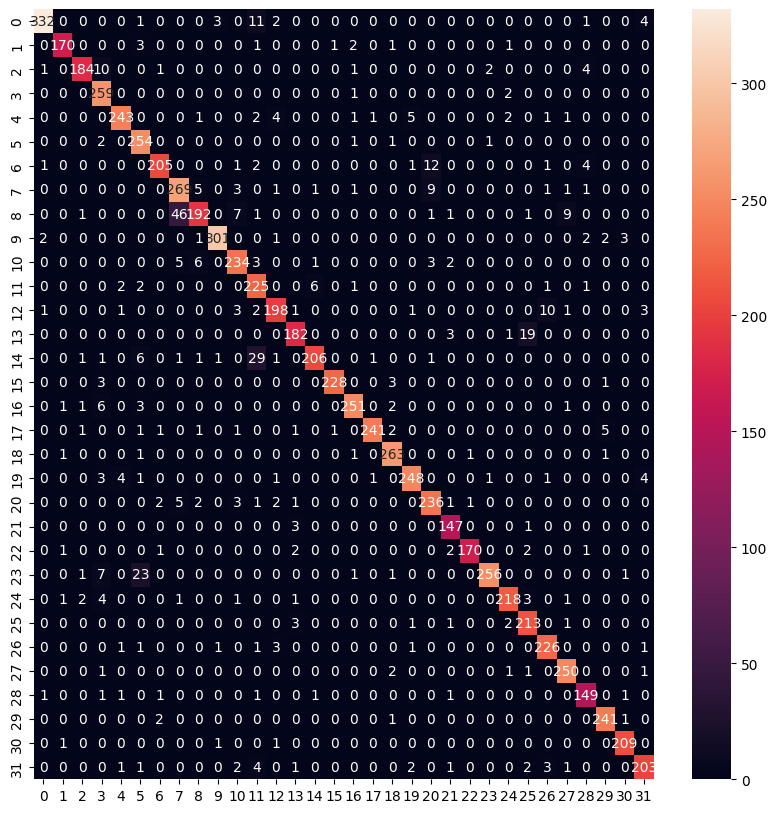

In [33]:
#concatenate all images and labels
images = np.concatenate(images)
labels = np.concatenate(labels)

#predict labels for test set
y_pred_model = model.predict(images)

#convert labels to integers
y_pred_m = np.argmax(y_pred_model, axis=1)
y_true = np.argmax(labels, axis=1)

#plot classification report
print(classification_report(y_true, y_pred_m))

# Print the confusion matrix
print(confusion_matrix(y_true, y_pred_m))

#plot confusion matrix
cm = confusion_matrix(y_true, y_pred_m)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

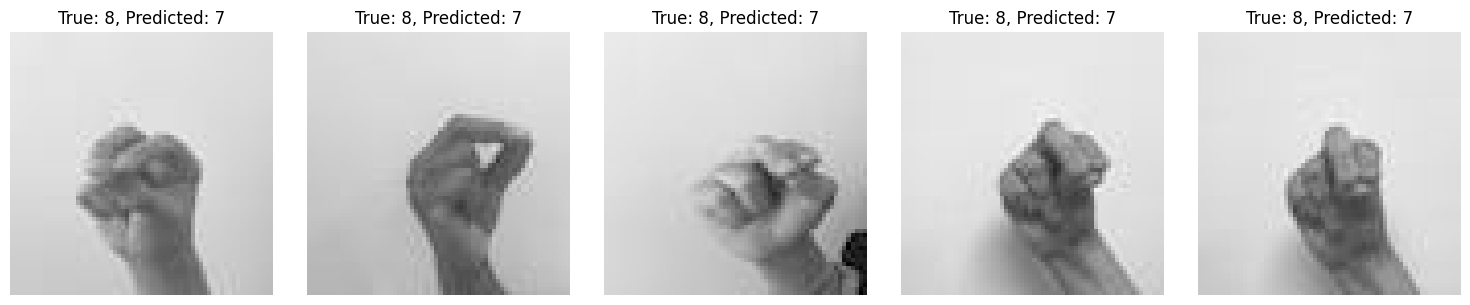

In [34]:
# Find misclassified samples
misclassified_indices = np.where(y_true != y_pred_m)[0]

# Get the most common misclassified class
most_common_misclass = np.argmax(np.bincount(y_true[misclassified_indices]))

# Get the indices of misclassified samples for the most common class
misclassified_indices_class = misclassified_indices[y_true[misclassified_indices] == most_common_misclass]

# Plot a selection of the misclassified images
num_samples_to_plot = 5
fig, axes = plt.subplots(1, num_samples_to_plot, figsize=(15, 3))

for i, index in enumerate(misclassified_indices_class[:num_samples_to_plot]):
    image = images[index]
    true_label = y_true[index]
    predicted_label = y_pred_m[index]
    
    axes[i].imshow(image)
    axes[i].set_title(f"True: {true_label}, Predicted: {predicted_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### Complex CNN

In [ ]:
model_complex = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape=(64, 64, 3)),
    LeakyReLU(alpha=0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3)),
    LeakyReLU(alpha=0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3)),
    LeakyReLU(alpha=0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3)),
    LeakyReLU(alpha=0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='softmax')
])

# Define a function that returns the learning rate as a function of the epoch number
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr *= 0.5
    if epoch > 20:
        lr *= 0.5
    return lr

# Create the Adam optimizer and the learning rate scheduler
adam = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

# compile the model
model_complex.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

early_stop = EarlyStopping(patience=5, monitor='val_loss', mode='min', verbose=1)

In [ ]:
# Start the timer
start_time = time.perf_counter()
# Get initial CPU times
initial_cpu_times = psutil.cpu_times()
# Get the current process ID
process_id = psutil.Process().pid

# train the model
history_complex = model_complex.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=500,
    validation_data=validation_generator,
    validation_steps=100,
    callbacks=[early_stop, lr_scheduler])

# Stop the timer
end_time = time.perf_counter()
# Get final CPU times
final_cpu_times = psutil.cpu_times()
# Get the memory usage of the current process
memory_info = psutil.Process(process_id).memory_info()

Epoch 1/500


<ipython-input-134-4e7bd692f73d>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_complex = model_complex.fit_generator(


200/200 [==============================] - 18s 81ms/step - loss: 2.8416 - accuracy: 0.2261 - val_loss: 5.0500 - val_accuracy: 0.0284 - lr: 0.0010
Epoch 2/500
200/200 [==============================] - 16s 79ms/step - loss: 1.7030 - accuracy: 0.4764 - val_loss: 3.7204 - val_accuracy: 0.2041 - lr: 0.0010


In [ ]:
# Calculate running time
running_time_complex = (end_time - start_time) / 60

# Calculate CPU usage
cpu_user_time = final_cpu_times.user - initial_cpu_times.user
cpu_system_time = final_cpu_times.system - initial_cpu_times.system
cpu_idle_time = final_cpu_times.idle - initial_cpu_times.idle

total_cpu_time = cpu_user_time + cpu_system_time + cpu_idle_time
cpu_usage_complex = (cpu_user_time + cpu_system_time) / total_cpu_time

# Calculate the absolute memory usage in bytes
absolute_memory_usage_complex = memory_info.rss

# Convert the memory usage to a human-readable format
memory_usage_human_complex = psutil._common.bytes2human(absolute_memory_usage_complex)

# Print the results
print("Running Time: {:.2f} minutes".format(running_time_complex))
print("CPU Usage: {:.2f} seconds".format(cpu_usage_complex))
print("Absolute Memory Usage: {} ({} bytes)".format(memory_usage_human_complex, absolute_memory_usage_complex))

In [ ]:
# Prepare the data
acc = history_complex.history['accuracy']
val_acc = history_complex.history['val_accuracy']
loss = history_complex.history['loss']
val_loss = history_complex.history['val_loss']
epochs = range(len(acc))

# Define the colors
colors = ['#a1c9f4', '#ffb6c1']  # Hexadecimal color codes for baby blue and baby pink, respectively

# Plot accuracy
plt.plot(epochs, acc, color=colors[0], label='Training accuracy')
plt.plot(epochs, val_acc, color=colors[1], label='Validation accuracy')

plt.title('Training and validation accuracy of Complex CNN')
plt.legend(loc=0)
plt.figure()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_complex.evaluate(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

In [ ]:
#predict labels for test set
y_pred_model_complex = model_complex.predict(images)

#convert labels to integers
y_pred_m_comp = np.argmax(y_pred_model_complex, axis=1)
y_true = np.argmax(labels, axis=1)

#plot classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_m_comp))

# Print the confusion matrix
print(confusion_matrix(y_true, y_pred_m_comp))

#plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_m_comp)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [ ]:
# Find misclassified samples
misclassified_indices = np.where(y_true != y_pred_m_comp)[0]

# Get the most common misclassified class
most_common_misclass = np.argmax(np.bincount(y_true[misclassified_indices]))

# Get the indices of misclassified samples for the most common class
misclassified_indices_class = misclassified_indices[y_true[misclassified_indices] == most_common_misclass]

# Plot a selection of the misclassified images
num_samples_to_plot = 5
fig, axes = plt.subplots(1, num_samples_to_plot, figsize=(15, 3))

for i, index in enumerate(misclassified_indices_class[:num_samples_to_plot]):
    image = images[index]
    true_label = y_true[index]
    predicted_label = y_pred_m_comp[index]
    
    axes[i].imshow(image)
    axes[i].set_title(f"True: {true_label}, Predicted: {predicted_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### GoogLeNet Inspired CNN

In [ ]:
# Define the GoogLeNet-inspired CNN model
def googlenet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Stage 1
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Stage 2
    x = layers.Conv2D(64, kernel_size=1, activation='relu')(x)
    x = layers.Conv2D(192, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Stage 3 (Inception modules)
    # Inception module 1
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    # Inception module 2
    x = inception_module(x, 128, 128, 192, 32, 96, 64)

    # Add more inception modules as needed...

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.4)(x)  # Optional: Add a dropout layer for regularization
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Helper function to create an inception module
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = layers.Conv2D(filters_1x1, kernel_size=1, activation='relu')(x)
    conv_3x3_reduce = layers.Conv2D(filters_3x3_reduce, kernel_size=1, activation='relu')(x)
    conv_3x3 = layers.Conv2D(filters_3x3, kernel_size=3, padding='same', activation='relu')(conv_3x3_reduce)
    conv_5x5_reduce = layers.Conv2D(filters_5x5_reduce, kernel_size=1, activation='relu')(x)
    conv_5x5 = layers.Conv2D(filters_5x5, kernel_size=5, padding='same', activation='relu')(conv_5x5_reduce)
    pool_proj = layers.Conv2D(filters_pool_proj, kernel_size=1, activation='relu')(x)

    output = layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output


In [ ]:
# Define the input shape
input_shape = (64, 64, 3)
model = googlenet(input_shape, 32)

#Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)


In [ ]:
# Start the timer
start_time = time.perf_counter()
# Get initial CPU times
initial_cpu_times = psutil.cpu_times()
# Get the current process ID
process_id = psutil.Process().pid


history_googlenet = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[early_stopping]
)


# Stop the timer
end_time = time.perf_counter()
# Get final CPU times
final_cpu_times = psutil.cpu_times()
# Get the memory usage of the current process
memory_info = psutil.Process(process_id).memory_info()

Epoch 1/15
1450/1450 [==============================] - 286s 196ms/step - loss: 1.2305 - accuracy: 0.6154 - val_loss: 0.9187 - val_accuracy: 0.7266
Epoch 2/15
1450/1450 [==============================] - 269s 185ms/step - loss: 0.3348 - accuracy: 0.8947 - val_loss: 0.3354 - val_accuracy: 0.9042
Epoch 3/15
1450/1450 [==============================] - 282s 195ms/step - loss: 0.2158 - accuracy: 0.9326 - val_loss: 0.2693 - val_accuracy: 0.9213


In [ ]:
# Calculate running time
running_time_googlenet = (end_time - start_time) / 60

# Calculate CPU usage
cpu_user_time = final_cpu_times.user - initial_cpu_times.user
cpu_system_time = final_cpu_times.system - initial_cpu_times.system
cpu_idle_time = final_cpu_times.idle - initial_cpu_times.idle

total_cpu_time = cpu_user_time + cpu_system_time + cpu_idle_time
cpu_usage_googlenet = (cpu_user_time + cpu_system_time) / total_cpu_time

# Calculate the absolute memory usage in bytes
absolute_memory_usage_googlenet = memory_info.rss

# Convert the memory usage to a human-readable format
memory_usage_human_googlenet = psutil._common.bytes2human(absolute_memory_usage_googlenet)

# Print the results
print("Running Time: {:.2f} minutes".format(running_time_googlenet))
print("CPU Usage: {:.2f} seconds".format(cpu_usage_googlenet))
print("Absolute Memory Usage: {} ({} bytes)".format(memory_usage_human_googlenet, absolute_memory_usage_googlenet))

In [ ]:
# Prepare the data
acc = history_googlenet.history['accuracy']
val_acc = history_googlenet.history['val_accuracy']
loss = history_googlenet.history['loss']
val_loss = history_googlenet.history['val_loss']
epochs = range(len(acc))

# Define the colors
colors = ['#a1c9f4', '#ffb6c1']  # Hexadecimal color codes for blue and pink, respectively

# Plot accuracy
plt.plot(epochs, acc, color=colors[0], label='Training accuracy')
plt.plot(epochs, val_acc, color=colors[1], label='Validation accuracy')

plt.title('Training and validation accuracy of GoogLeNet Inspired CNN')
plt.legend(loc=0)
plt.figure()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

In [ ]:
#predict labels for test set
y_pred_model= model.predict(images)

#convert labels to integers
y_pred_m_googlenet = np.argmax(y_pred_model, axis=1)
y_true = np.argmax(labels, axis=1)

#plot classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_m_googlenet))

# Print the confusion matrix
print(confusion_matrix(y_true, y_pred_m_googlenet))

#plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_m_googlenet)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [ ]:
# Find misclassified samples
misclassified_indices = np.where(y_true != y_pred_m_googlenet)[0]

# Get the most common misclassified class
most_common_misclass = np.argmax(np.bincount(y_true[misclassified_indices]))

# Get the indices of misclassified samples for the most common class
misclassified_indices_class = misclassified_indices[y_true[misclassified_indices] == most_common_misclass]

# Plot a selection of the misclassified images
num_samples_to_plot = 5
fig, axes = plt.subplots(1, num_samples_to_plot, figsize=(15, 3))

for i, index in enumerate(misclassified_indices_class[:num_samples_to_plot]):
    image = images[index]
    true_label = y_true[index]
    predicted_label = y_pred_m_googlenet[index]
    
    axes[i].imshow(image)
    axes[i].set_title(f"True: {true_label}, Predicted: {predicted_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### Comparison computational metrics


In [ ]:
# Prepare the data
labels = ['Memory Usage Simple CNN', 'Memory Usage Complex CNN', 'Memory Usage GoogLeNet']
values = [memory_usage_human_simple, memory_usage_human_complex, memory_usage_human_googlenet]

# Define the colors
colors = ['#a1c9f4', '#ffb6c1', '#b7e4b4']  # Hexadecimal color codes for baby blue, baby pink, and baby green, respectively

# Create a bar plot
plt.bar(labels, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Memory Usage Models')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Prepare the data
labels = ['CPU Usage Simple CNN', 'CPU Usage Complex CNN', 'CPU Usage GoogLeNet']
values = [cpu_usage_simple, cpu_usage_complex, cpu_usage_googlenet]

# Define the colors
colors = ['#a1c9f4', '#ffb6c1', '#b7e4b4']  # Hexadecimal color codes for baby blue, baby pink, and baby green, respectively

# Create a bar plot
plt.bar(labels, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('CPU Usage Models')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Prepare the data
labels = ['Running Time Simple CNN', 'Running Time Complex CNN', 'Running Time GoogLeNet']
values = [running_time_simple, running_time_complex, running_time_googlenet]

# Define the colors
colors = ['#a1c9f4', '#ffb6c1', '#b7e4b4']  # Hexadecimal color codes for baby blue, baby pink, and baby green, respectively

# Create a bar plot
plt.bar(labels, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Running Time Models')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()
